<center><h1> Welcome to the Profiler for</h1>
<img src="champIcons/Riot_Games_logo.png" alt="Riot Games" width="100">
<img src="champIcons/League-of-Legends-Game-Logo.jpg" alt="League Icon" width="200"></center>

In [62]:
import json
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import pprint
import matplotlib.pyplot as plt
import tkinter
from PIL import ImageTk, Image
import os
import shutil
import time
%matplotlib inline
key = '98d64dad-53c8-43e0-b947-aaee85100403'

# Set up

In [2]:
def getChampIconPath(champID):
    return champ_dict[champID].lower().replace(' ', '').replace('\'', '') + '.png'

In [3]:
#champion info names
url = 'https://global.api.pvp.net/api/lol/static-data/na/v1.2/champion?api_key=98d64dad-53c8-43e0-b947-aaee85100403'
championInfo = requests.get(url)
#pprint.pprint(championInfo.json())

In [4]:
champ_dict = {}
for champion in championInfo.json()['data']:
    champ_dict[championInfo.json()['data'][champion]['id']] = championInfo.json()['data'][champion]['name']
    #print(championInfo.json()['data'][champion]['name'])
    #print(championInfo.json()['data'][champion]['id'])

In [5]:
def getChampSimpleName(champID):
    return champ_dict[champID].lower().replace(' ', '').replace('\'', '').replace('.','')

In [6]:
champ_ids = {}
for champ_id in champ_dict:
    s = getChampSimpleName(champ_id)
    champ_ids[s] = champ_id

In [7]:
def getChampIconPath(champID):
    return "champIcons/"+champ_dict[champID].lower().replace(' ', '').replace('\'', '').replace('.','') + '.png'

In [63]:
def getChampIcon(champName):
    baseName = champName.replace(' ', '').replace('\'', '').replace('.','')
    response = requests.get("http://ddragon.leagueoflegends.com/cdn/6.24.1/img/champion/"+baseName+'.png') 
    img = Image.open(BytesIO(response.content))
    img.save('tmpChampIcons/'+baseName+'.png')
    return 'tmpChampIcons/'+baseName+'.png'

In [8]:
def getChampIconPath_fromString(champName):
    return "champIcons/"+champName.lower().replace(' ', '').replace('\'', '').replace('.','') + '.png'

In [9]:
def getChampID(simpleName):
    return champ_ids[simpleName]    

In [10]:
def getSummonerChampLevel(tempChampID, summID):
    url = 'https://na.api.pvp.net/championmastery/location/NA1/player/'+str(summID)+'/champion/'+str(tempChampID)+'?api_key='+key
    getChampExp = requests.get(url)
    if getChampExp.status_code == 200:
        #has experience
        return getChampExp.json()['championLevel']
    else:
        return 0

In [11]:
def forget(widgetSlaves, deleteEntryText):
    if deleteEntryText:
        entry.delete(0, tkinter.END)
    for slave in widgetSlaves.grid_slaves():
        slave.grid_forget()

In [74]:
def getGraph(sumID):
    #if sumID.is
    sumID = str(sumID)
    url = 'https://na.api.pvp.net/api/lol/na/v1.3/stats/by-summoner/'+sumID+'/summary?season=SEASON2017&api_key='+key
    response = requests.get(url)
    summoner_data = response.json()
    #print all game type stats
    my_dict = {}
    #print('Stats for: '+nameRequested + '\n')
    totalWins = 0
    for gameType in summoner_data['playerStatSummaries']:
        #print(gameType['playerStatSummaryType'])
        #print('------------------')
        totalWins += gameType['wins']
        #print('wins: '+str(gameType['wins']))
        #pprint.pprint(gameType['aggregatedStats'])
        #print('')
        my_dict[gameType['playerStatSummaryType']] = gameType['wins']

    #Total Wins in all Modes: totalWins
    df_wins = pd.Series(my_dict, name='Wins')
    df_wins = df_wins.reset_index().rename(columns={"index": "GameType"})
    df_wins = df_wins.sort_values(by='Wins', ascending=False)
    return df_wins.plot.bar(x=df_wins.GameType)
    
    

# What is this tool?

### What does it do?
    - It allows you to view a single Summoner Profile and view their top 5 ranked champions
   
### Why?




# This is the magic 

In [13]:
def cleanRun():
    if 'response' in locals():
        del(response)
    if 'data' in locals():
        del(data)
    if 'sumName' in locals():
        del(sumName)
    if 'sumID' in locals():
        del(sumID)
    if 'rank' in locals():
        del(rank)
    if 'textRank' in locals():
        del(textRank)
    if 'personal_champ_ranked_stats' in locals():
        del(personal_champ_ranked_stats)
    if 'df_personal_champ_ranked_stats' in locals():
        del(df_personal_champ_ranked_stats)
    if 'top_champs' in locals():
        del(top_champs)
    if 'text_top_champs' in locals():
        del(text_top_champs)
    if 'champArray' in locals():
        del(champArray)
    if 'root' in locals():
        stats1.grid_forget()
        stats2.grid_forget()
        stats3.grid_forget()
        stats4.grid_forget()
        stats5.grid_forget()
        icon1.grid_forget()
        icon2.grid_forget()
        icon3.grid_forget()
        icon4.grid_forget()
        icon5.grid_forget()
        rankLabel.grid_forget()
        del(img1)
        del(img2)
        del(img3)
        del(img4)
        del(img5)
        del(name)
        nameLabel.grid_forget()
        
    

In [69]:
def summonerLookup(event):
    forget(frame, False)
    name = entry.get()
    nameLabel = tkinter.Label(frame, text=name, font=("Helvetica", 12))
    nameLabel.grid(row=1)
    nameRequestedFormatted = name.replace(' ', '%20')
    url = 'https://na.api.pvp.net/api/lol/na/v1.4/summoner/by-name/'+nameRequestedFormatted+'?api_key='+key
    response = requests.get(url)
    data = response.json()
    
    #get Summoner ID and name
    sumName = ''
    for name in data:
        sumName = name
    sumID = data[sumName]['id']
    sumID = str(sumID)
    
    #Get summoner Rank
    url = 'https://na.api.pvp.net/api/lol/na/v2.5/league/by-summoner/'+sumID+'?api_key='+key
    rank = requests.get(url)         
    textRank = ''
    if rank.status_code == 200:
        for player in rank.json()[sumID][0]['entries']:
            if player['playerOrTeamId'] == sumID:
                textRank = rank.json()[sumID][0]['tier'].capitalize() + ' '+player['division']+ ' - ' + 'LP: '+str(player['leaguePoints'])
        rankLabel = tkinter.Label(frame, text=textRank, font=("Helvetica", 12))
    else:
        textRank = 'Unranked'
        rankLabel = tkinter.Label(frame, text=textRank, font=("Helvetica", 12))
    rankLabel.grid(row=1, column=1)
    
    #get Ranked Stats
    url = 'https://na.api.pvp.net/api/lol/na/v1.3/stats/by-summoner/'+sumID+'/ranked?season=SEASON2017&api_key='+key
    rankedStats = requests.get(url)
    if rankedStats.status_code == 200:
        #get all champion ranked stats by champ id and put into DF
        personal_champ_ranked_stats = {}
        for champ in rankedStats.json()['champions']:
            if(champ['id'] == 0):
                continue
            personal_champ_ranked_stats[champ['id']] = champ['stats']

        df_personal_champ_ranked_stats = pd.DataFrame(personal_champ_ranked_stats)
        df_personal_champ_ranked_stats = df_personal_champ_ranked_stats.T
        df_personal_champ_ranked_stats['KDA'] = (df_personal_champ_ranked_stats.totalAssists + df_personal_champ_ranked_stats.totalChampionKills) / df_personal_champ_ranked_stats.totalDeathsPerSession
        df_personal_champ_ranked_stats['winRatio'] = df_personal_champ_ranked_stats.totalSessionsWon / df_personal_champ_ranked_stats.totalSessionsPlayed
        df_personal_champ_ranked_stats = df_personal_champ_ranked_stats.T

        #get top ranked champs
        top_champs = df_personal_champ_ranked_stats.T.sort_values(by='totalSessionsPlayed', ascending=False)[0:5]
        
        #show relevant stats for champs
        text_top_champs = ''
        champArray = []
        champMastery = []
        for c in top_champs.T:
            text_top_champs += champ_dict[c] +'\n'
            text_top_champs +='Games Played: '+ str(top_champs.T[c].totalSessionsPlayed)+'\n'
            text_top_champs +='KDA: '+str(top_champs.T[c].KDA) +'\n'
            text_top_champs +='Win Ratio: {percent:.1%}'.format(percent=top_champs.T[c].winRatio)
            tempLvl = getSummonerChampLevel(c, sumID)
            champMastery.append(tempLvl)
            champArray.append(text_top_champs)
            text_top_champs = ''
        rowNum = 3 #starting row for champs
        for c in champArray:
            text = c
            stats = tkinter.Listbox(frame, height=4)
            for stat in text.split('\n'):
                stats.insert('end',stat)
            img = tkinter.PhotoImage(file=getChampIcon(text.split('\n')[0]))
            icon = tkinter.Label(frame,image=img)
            icon.image = img
            icon.grid(row=rowNum)
            stats.grid(row=rowNum, column=1, sticky=tkinter.N+tkinter.S)
            rowNum = rowNum+1
            
        tempNum = 0
        for m in champMastery:
            tempNum +=1
            if m > 4:
                masteryImg = tkinter.PhotoImage(file='champMastery/lvl'+str(m)+'-Flag2.png')
                masteryIcon = tkinter.Label(frame, image=masteryImg)
                masteryIcon.image = masteryImg
                masteryIcon.grid(row=tempNum+2, sticky=tkinter.N+tkinter.W)
                
    g = getGraph(sumID)
    f = g.get_figure()
    f.tight_layout()
    f.savefig('gameTypesPlayed.png')
    imgGraph = tkinter.PhotoImage(file='gameTypesPlayed.png')
    graphGames = tkinter.Label(frame,image=imgGraph)
    graphGames.image = imgGraph
    graphGames.grid(row=3, column=5, rowspan=3, columnspan=3)
    
    

# Execute this to analyze a Summoner

In [70]:
def quit():
    shutil.rmtree('tmpChampIcons')
    root.destroy()

In [71]:
firstRun = True

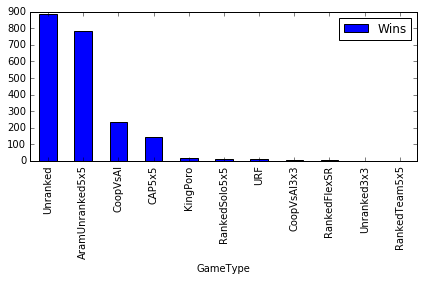

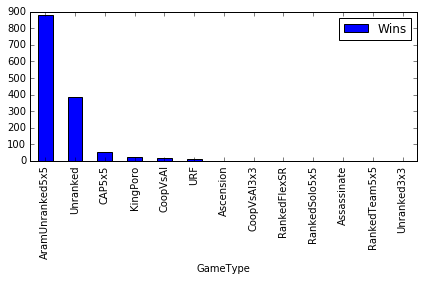

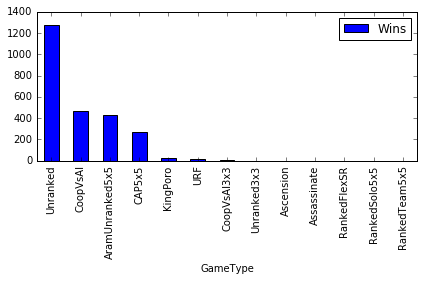

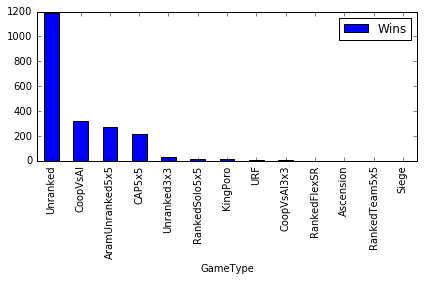

In [76]:
if firstRun == False:
    del(root)
firstRun = False
cleanRun()
shutil.rmtree('tmpChampIcons')
os.mkdir('tmpChampIcons') #makes temp champ icons folder 
root = tkinter.Tk()
root.minsize(700, 700)
root.geometry('%dx%d+%d+%d' % (800, 400, 0, 0))
#root.wm_attributes('-fullscreen', True)
#root.wm_attributes('-topmost',True)
#root.wm_attributes('-alpha', 0.5)
root.title('Summoner Profile')
#root.overrideredirect(1)
tkinter.Label(root, text="Summoner Name:").grid(row=0)
frame = tkinter.Frame()
frame.grid(row=1, rowspan = 7, columnspan = 7, sticky = tkinter.W+tkinter.E+tkinter.N+tkinter.S)
entry = tkinter.Entry(root)
entry.bind("<Return>", summonerLookup)
entry.grid(row=0, column=1)

#then nothing
#throw rest of code in evaluate
#scrollbar = tkinter.Scrollbar(root)
#scrollbar
#scrollbar.pack()
#search = tkinter.Button(root, text="Search", command=summonerLookup(1))
#search.grid(row=0, column=2)
b = tkinter.Button(root, text="Clear Results", command=lambda: forget(frame, True))
b.grid(row=0, column=3)
tkinter.Button(root, text="Quit", command=root.destroy).grid(row=0, column=4)

root.mainloop()